## CASE STUDY 8: Inventory and Stock Management

### This is the case study I am assigned to work on Inventory and Stock Management and explore the different dimmensions of the data available.

### We are using pandas and numpy to work on AdventureWorks database.
#### So the basic steps include as follows:
#### 1.Connect to the database:  working in Python, we can use pyodbc to connect to the AdventureWorks database.
#### 2.Load the data into a DataFrame: Use pandas.read_sql() to load the query results into a DataFrame for further analysis.

In [1]:
#importing all the packages required.
import pandas as pd #To work with pandas dataframe.
import pyodbc
import warnings
warnings.filterwarnings('ignore')
#We are going to filter the warnings so that we do not get any warnings and our output looks good.

In [2]:
#connection details

server="USHASAI\\SQLEXPRESS01"
database='AdventureWorks2019'
username='sa'
password='usha1234'

#connection string
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

#connect to SQL server


try:
    conn=pyodbc.connect(connection_string)
    print("Connection successfully established!")
    
    # Define sSQL query
    query="select top 10 * from [AdventureWorks2019].[HumanResources].[Department]"
    
    
    # Execute query and load into Dataframe
    df=pd.read_sql(query,conn)
    df
except Exception as e:
    print(f"Error: {e}")

Connection successfully established!


### Now it's the time to import all the tables that are required to perform the analysis

In [ ]:
#The required tables are:


In [3]:
query="select * from [Production].[ProductInventory]"
product_inventory_data=pd.read_sql(query,conn)

query="select * from [production].[Product]"
product_data=pd.read_sql(query,conn)

query="Select * from [Sales].[SalesOrderDetail]"
sales_order_detail_data=pd.read_sql(query,conn)

query="Select * from [purchasing].[ProductVendor]"
product_vendor=pd.read_sql(query,conn)

### 1. Select ProductID, Quantity, and LocationID columns from the  ProductInventory DataFrame.

###  To get a particular columns we can use simply Column Indexing which is also called as column subset selection and it provides the desired columns

In [14]:
#Getting the desired columns
selected_columns=product_inventory_data[['ProductID','Quantity','LocationID']]

#printing the desired columns
print(selected_columns)

      ProductID  Quantity  LocationID
0             1       408           1
1             1       324           6
2             1       353          50
3             2       427           1
4             2       318           6
...         ...       ...         ...
1064        997        30          60
1065        998        99           7
1066        998        56          60
1067        999        78           7
1068        999       116          60

[1069 rows x 3 columns]


### 2. Sort the ProductInventory DataFrame by Quantity in descending order.

### We can perform this in different ways. one of them is by using sort_values() in this function we specify parameters as by='Quantity' and ascending='False' as we need to sort the dataframe using Quantity in desending order

In [20]:
#Sorting the data
sorted_data=product_inventory_data.sort_values(by='Quantity',ascending=False)
sorted_data=sorted_data.reset_index()#.reset_index() is used to reset the index values

#printing the sorted data
print(sorted_data)

      index  ProductID  LocationID Shelf  Bin  Quantity  \
0       590        528           6     F    5       924   
1       172        379           6     R   21       897   
2       588        527           6     B    4       888   
3       214        393           6     R   35       780   
4       227        397          50     E   39       763   
...     ...        ...         ...   ...  ...       ...   
1064    518        494          40     B    3         4   
1065    831        859           7   N/A    0         0   
1066    825        853           7   N/A    0         0   
1067    854        882           7   N/A    0         0   
1068    848        876           7   N/A    0         0   

                                   rowguid ModifiedDate  
0     3BB6B654-0D95-408A-9FD3-E32E133CC9D1   2014-08-11  
1     78120DF1-86F2-4B14-B0D4-782FA1FDF229   2014-07-19  
2     FFAE06C0-6DC1-4D15-B1E9-74A68A33072D   2014-08-11  
3     CFD67534-3382-43D6-9DE3-5A275D809EA3   2014-08-10  
4

### 3. Retrieve distinct LocationID values from the ProductInventory DataFrame.

### This query is used to access the distinct location Id's from the dataframe.In order to retreive the distinct LocationID's from the data frame we can use unique() to filter all the distinct LocationID's values from the dataframe.

In [23]:
#Getting all the unique Location_ID's
unique_locations=product_inventory_data['LocationID'].unique()

#Printing all the unique ID's

print(unique_locations)

[ 1  6 50  5 10 60 20  2  3  4 40  7 30 45]


### 4. Filter products with Quantity less than 100.

### To achieve this query we can simply use conditions in the Column Indexing(Column Subset Selection) like '<' operator this will create a boolean mask that filter the rows where the conditon is met and applying this mask to data frame, It provides the rows that has True values.


In [34]:
#Filtering the data that has Quantity less than 100
masked_data=product_inventory_data['Quantity']<100

#Converting the masked data to achieve the original filtered data from the dataframe.
filtered_data=product_inventory_data[masked_data]

#printing the results.
filtered_data

,ProductID,LocationID,Shelf,Bin,Quantity,rowguid,ModifiedDate
510,492,3,A,3,17,F3B4712F-44B3-4A53-B245-63C39476BD53,2014-08-11
511,492,4,A,6,14,87AC9F46-E5C5-4C75-9D14-43340ED0AA50,2014-08-11
512,492,40,B,2,16,A0CF23BF-264D-411D-89F8-EDC6FB5DEE8F,2014-08-11
513,493,3,A,2,41,318E5D8B-83CA-416C-80D7-C77854B0B612,2014-08-11
514,493,4,A,8,24,4927F190-22CC-486A-93C8-57A7FD3124BE,2014-08-11
...,...,...,...,...,...,...,...
1053,993,60,N/A,0,30,A4D61B97-FC1F-4C57-B19F-1EAC3533FD13,2013-04-30
1064,997,60,N/A,0,30,731E624A-BD0D-447C-9FE1-472F73917897,2013-04-30
1065,998,7,N/A,0,99,B859A235-A1CC-48D7-92BB-10D0C2886E4E,2013-04-30
1066,998,60,N/A,0,56,5021E7EA-CE96-433C-860A-B9E57A45EF03,2013-04-30


### 5. Count the total number of inventory records in the ProductInventory DataFrame.

### To find the total number of records in the dataframe we can use a .shape attribute of pandas Library. It generally returns a tuple that contains number of rows and columns. So we can use shape[0] to get the number of records. (We can also use count function to get the records).


In [36]:
#Printing the number of records in the product_inventory_data dataframe.
product_inventory_data.shape[0]

1069

### 6. Find products that are out of stock.

### According to my analysis, to find products that out of stock we need to filter the data that has quantity as zero(0).This describes that this particular product is out of stock.

 ### To find the Quantity that has zero(0) we can filter the data using conditions in the Column Indexing

In [40]:
# Filtering the data that has Quantity as '0'

out_of_stock=product_inventory_data[(product_inventory_data['Quantity']== 0)]
#Printing the products that are out os stock.
out_of_stock

,ProductID,LocationID,Shelf,Bin,Quantity,rowguid,ModifiedDate
825,853,7,N/A,0,0,2961BA75-2083-481C-8A35-6AC8B139DCCE,2012-04-30
831,859,7,N/A,0,0,911FA74B-0353-4BB9-AA58-82A86E626B17,2012-04-30
848,876,7,N/A,0,0,5C965EC8-6FAB-42BF-AF30-02CAD1F2A56E,2013-04-30
854,882,7,N/A,0,0,71ADDBA2-E713-4CEF-B861-B9C0A71CCE1D,2013-04-30


### 7. Check for any negative quantities in the inventory data.

### To check for any negative quantities in the data we can use condition as '<0'  along with column indexing for the column 'Quantity'

In [41]:
# Getting the negative data if it exists

negative_data=product_inventory_data[(product_inventory_data['Quantity'] < 0)]

#Printing the negative data
negative_data

,ProductID,LocationID,Shelf,Bin,Quantity,rowguid,ModifiedDate


#### This analysis shows that there are no negative quantities in the inventory data.I there are any negative rows they are showed in 'negative_data' dataframe.
#### This shows that the data is accurate for further analysis.(as we can't have any negative quantities in real life)

### 8. Select inventory records updated in the last month.

### To calculate the reocrds updated in the last month we can use date module like Timestamp to find the dates related to last month and then use modify date column to slect the records updated in last month.

In [58]:
#product_inventory_data['ModifiedDate'].max() is used to extract the max date in the dataframe inventory
max_date=pd.Timestamp('2014-08-12')
one_month_ago=max_date - pd.DateOffset(months=1)

#Fetching the last month data
last_month_update=product_inventory_data[(product_inventory_data['ModifiedDate'] > one_month_ago)]

#printing the lastmonth modified data
last_month_update

,ProductID,LocationID,Shelf,Bin,Quantity,rowguid,ModifiedDate
0,1,1,A,1,408,47A24246-6C43-48EB-968F-025738A8A410,2014-08-08
1,1,6,B,5,324,D4544D7D-CAF5-46B3-AB22-5718DCC26B5E,2014-08-08
2,1,50,A,5,353,BFF7DC60-96A8-43CA-81A7-D6D2ED3000A8,2014-08-08
3,2,1,A,2,427,F407C07A-CA14-4684-A02C-608BD00C2233,2014-08-08
4,2,6,B,1,318,CA1FF2F4-48FB-4960-8D92-3940B633E4C1,2014-08-08
...,...,...,...,...,...,...,...
958,948,5,J,1,347,FFD07590-9F3C-4ABF-80C7-353C66BD8429,2014-08-12
959,948,50,A,1,420,1CF7AC5D-EC65-4082-981D-5DA23DDA0E04,2014-08-12
969,952,1,C,5,236,7A254A77-B8A6-40DF-8E87-DCFECE42D6DA,2014-08-08
970,952,5,A,5,192,526B82AB-C32F-413E-BD3C-60D2CA192A82,2014-08-08


### Medium Category Queries

### 9. Calculate the total stock per location.

### To calculate the total stock per location we can group the data by locations and then use the sum function to get the total stock per location and use reset_index() to reset the index values.

In [59]:
# Calculate the total stock per location
total_stock_per_location = product_inventory_data.groupby('LocationID')['Quantity'].sum().reset_index()

# Display the total stock per location
print(total_stock_per_location)


    LocationID  Quantity
0            1     72899
1            2      5549
2            3       186
3            4       110
4            5     20295
5            6     83173
6            7     17319
7           10     13584
8           20      5165
9           30       958
10          40       508
11          45       332
12          50     95477
13          60     20419


### 10. Merge the ProductInventory and Product DataFrames on ProductID.

### To merge the data frames on a particular column we can use merge function from pandas with different parameters as:left(the left table),right(the right table),on(by which column),how(this spesifies the type of merge as inner,left,right...)

In [61]:
#merging the tables on 'ProductID' using merge() function

new_df=pd.merge(product_inventory_data,product_data,on='ProductID',how='inner')

#printing the new dataframe
new_df

,ProductID,LocationID,Shelf,Bin,Quantity,rowguid_x,ModifiedDate_x,Name,ProductNumber,MakeFlag,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid_y,ModifiedDate_y
0,1,1,A,1,408,47A24246-6C43-48EB-968F-025738A8A410,2014-08-08,Adjustable Race,AR-5381,False,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
1,1,6,B,5,324,D4544D7D-CAF5-46B3-AB22-5718DCC26B5E,2014-08-08,Adjustable Race,AR-5381,False,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
2,1,50,A,5,353,BFF7DC60-96A8-43CA-81A7-D6D2ED3000A8,2014-08-08,Adjustable Race,AR-5381,False,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
3,2,1,A,2,427,F407C07A-CA14-4684-A02C-608BD00C2233,2014-08-08,Bearing Ball,BA-8327,False,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08 10:01:36.827
4,2,6,B,1,318,CA1FF2F4-48FB-4960-8D92-3940B633E4C1,2014-08-08,Bearing Ball,BA-8327,False,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08 10:01:36.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,997,60,N/A,0,30,731E624A-BD0D-447C-9FE1-472F73917897,2013-04-30,"Road-750 Black, 44",BK-R19B-44,True,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,44CE4802-409F-43AB-9B27-CA53421805BE,2014-02-08 10:01:36.827
1065,998,7,N/A,0,99,B859A235-A1CC-48D7-92BB-10D0C2886E4E,2013-04-30,"Road-750 Black, 48",BK-R19B-48,True,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,3DE9A212-1D49-40B6-B10A-F564D981DBDE,2014-02-08 10:01:36.827
1066,998,60,N/A,0,56,5021E7EA-CE96-433C-860A-B9E57A45EF03,2013-04-30,"Road-750 Black, 48",BK-R19B-48,True,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,3DE9A212-1D49-40B6-B10A-F564D981DBDE,2014-02-08 10:01:36.827
1067,999,7,N/A,0,78,61A26DB0-BD17-442B-B119-8E5227811B82,2013-04-30,"Road-750 Black, 52",BK-R19B-52,True,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,AE638923-2B67-4679-B90E-ABBAB17DCA31,2014-02-08 10:01:36.827


#### There can be same attributes in bothe the tables these are represented using 'column_x' and 'column-y'. From the analysis above we can see that rowguid and modified date are repeated. so these are shown as 'rowguid_x'(left table),'rowguid_y'(right table) similarly with Modified data.

### 11. Create an intermediate DataFrame to calculate the average stock level per location.

### To calculate the average stock level per location, we  first need to create an intermediate DataFrame that groups the data by LocationID and then computes the average Quantity for each location. and then use reset_index() function to reset the index values.

In [65]:
# Group by LocationID and calculate the average stock level per location
intermediate_data = product_inventory_data.groupby('LocationID')['Quantity'].mean().reset_index()

# Rename the column for clarity
intermediate_data.columns = ['LocationID', 'AverageStock']

# Display the intermediate DataFrame
print(intermediate_data)


    LocationID  AverageStock
0            1    436.520958
1            2    462.416667
2            3     37.200000
3            4     22.000000
4            5    397.941176
5            6    413.796020
6            7    114.695364
7           10    295.304348
8           20    258.250000
9           30    136.857143
10          40     56.444444
11          45    110.666667
12          50    380.386454
13          60    144.815603


### 12. Filter locations with total stock greater than 1,000 units.

#### To do this analysis we need to group the data by LocationId and sum the quantities available and use rest_index to reset the index values and name the new column .And then use conditions to fetch the data where stocks are greater than 1000

In [79]:
#Preparing the data that contains locationid's and total quantities using groupby function.

stock_per_loc=product_inventory_data.groupby('LocationID')['Quantity'].sum().reset_index(name="TotalQuantities")
#The total quanties look irregular we can sort the data for a better understanding.
stock_per_loc.sort_values('TotalQuantities')

#To fetch the data where total Quantities is >1000 units.
fetched_data=stock_per_loc[(stock_per_loc['TotalQuantities']>= 1000)]
print(fetched_data)

    LocationID  TotalQuantities
0            1            72899
1            2             5549
4            5            20295
5            6            83173
6            7            17319
7           10            13584
8           20             5165
12          50            95477
13          60            20419


In [72]:
#Flitering the data that has stock >1000 units

stock=intermediate_data[(intermediate_data['AverageStock'] > 1000)]

#printing the data
stock

Series([], Name: LocationID, dtype: int64)

#### As we observe we are not going to get any records as the stock doesn't have products greater than 1000 units

### 13. Identify products with overstock issues.

#### To identity the products with over stock issues we need to merge the dataframes product and productinventory on productid
#### Then use the SafetyStockLevel column to identify the overstock issues by checking if stock is greater than safetyStockLevel

In [82]:
#merging the data
merged_data=pd.merge(product_inventory_data,product_data,on='ProductID',how="inner")
                                         # Here we use parameters as 'on' that indicates on which column should merge happen
                                         #'how' indicates the type of merge to take place.
#Fetching the data that has overstock issues
over_stock=merged_data[(merged_data['Quantity'] > merged_data['SafetyStockLevel'])]

#printing the data that has over stock issues
over_stock[['ProductID','Quantity','SafetyStockLevel']]



,ProductID,Quantity,SafetyStockLevel
609,707,288,4
610,708,324,4
611,709,180,4
612,710,216,4
613,711,216,4
...,...,...,...
1043,988,116,100
1051,992,104,100
1052,993,123,100
1063,997,123,100


#### We just printed only 3 columns: ProductID,Quantity and SafetyStockLevel for better understanding

### 14. Calculate the stock turnover rate for each product.

### The formula for stock turn over is = cost of goods sold/avg inventory


#### to calculate cost price of goods sold we need to extract quantity sold and unitprice from the data salesOrderDetails
#### Now we need to calculate the avg inventory from inventory table for each product by grouping productId.


In [103]:
#Extracting the required columns from SalesOrderDetail data
goods_sold=sales_order_detail_data[['ProductID','OrderQty','UnitPrice']]

#Finding the total cost of all goods for each product and use reset_index() to reset the index values 
cost_goods_sold=goods_sold.groupby('ProductID')['UnitPrice'].sum().reset_index()
#Renaming the columns for better understanding
cost_goods_sold.columns=['ProductID','CostOfGoodsSold']


#Finding the average inventory
avg_int=product_inventory_data.groupby('ProductID')['Quantity'].mean().reset_index()
#renaming the columns for better understanding
avg_int.columns=['ProductID','AVGInventory']

#Merging the new dataframes on productID

stock_turn_over=pd.merge(cost_goods_sold,avg_int,on='ProductID',how='inner')

#calculating the stock turn over for each product

stock_turn_over['StockTurnOverRate']=stock_turn_over['CostOfGoodsSold']/stock_turn_over['AVGInventory']

#Printing the stock turnover rate for each productID
stock_turn_over[['ProductID','StockTurnOverRate']]

,ProductID,StockTurnOverRate
0,707,330.636041
1,708,282.597935
2,709,5.907417
3,710,1.161111
4,711,434.388225
...,...,...
205,994,17.908231
206,996,49.147089
207,997,2990.062275
208,998,3873.086985


### 15. Determine safety stock levels for critical products.

#### To find the safety stock level for crtical products we need to find the critical products.
#### In order to find the critical products by using column makeflag we find the critical products.
#### Now compare these crtical products with safety stock level and print them.


In [109]:
#Finding the critical Products
critical_products=product_data[(product_data['MakeFlag']==True)]
#printing the safety stock level for critical products
critical_products['SafetyStockLevel'].reset_index()


,index,SafetyStockLevel
0,2,800
1,4,800
2,12,1000
3,15,800
4,16,1000
...,...,...
234,499,500
235,500,500
236,501,100
237,502,100


### 16. Filter products that require  reordering.

#### To filter the products that require reordering the process is:
#### Calculate Current Inventory: Aggregate the current inventory levels for each product.
#### Filter Products: Identify products where the current inventory is less than the reorder point from product_data

In [124]:
#Agregating the current inventory levels for each product
current_inventory=product_inventory_data.groupby('ProductID')['Quantity'].sum().reset_index()
current_inventory.columns=['ProductID','CurrentInventory']

#merging the data with product_data on productID

product_inventory = pd.merge(product_data, current_inventory, on='ProductID', how='left')

# Filter products that require reordering
# Reorder if current inventory is less than the reorder point
products_requiring_reorder = product_inventory[product_inventory['CurrentInventory'] \
                                                    < product_inventory['ReorderPoint']]

# Display products that require reordering
print(products_requiring_reorder[['ProductID', 'Name', 'CurrentInventory', 'ReorderPoint']])


     ProductID                            Name  CurrentInventory  ReorderPoint
64         386                       Hex Nut 1             725.0           750
140        462                 Lower Head Race             701.0           750
357        853               Women's Tights, M               0.0             3
363        859           Half-Finger Gloves, M               0.0             3
380        876             Hitch Rack - 4-Bike               0.0             3
386        882  Short-Sleeve Classic Jersey, M               0.0             3
414        910         HL Mountain Seat/Saddle             355.0           375


### Hard Category Queries

### 17. Rank locations by total stock levels.

#### To rank the data we need to group the data by loactions and find the sum of quantities using sum function.
#### use .columns to rename the column names
#### now use rank function in pandas to assign a rank to the records based on sum of quantities 
#### use the parameter method='dense' to ensure consecutive rankings even if we have same values for multiple locations
#### and also ascending ='False' so that the ranks are allocated in descending order. 

In [128]:
total_stock=product_inventory_data.groupby('LocationID')['Quantity'].sum().reset_index()

#Renaming the columns
total_stock.columns=['LocationID','TotalStock']

#assigning a rank
total_stock['Rank']=total_stock['TotalStock'].rank(method='dense',ascending=False)

#sort the dataframe according to the rank
ranking=total_stock.sort_values(by='Rank')

#Printing the data
ranking

,LocationID,TotalStock,Rank
12,50,95477,1.0
5,6,83173,2.0
0,1,72899,3.0
13,60,20419,4.0
4,5,20295,5.0
6,7,17319,6.0
7,10,13584,7.0
1,2,5549,8.0
8,20,5165,9.0
9,30,958,10.0


### 18. Find the top 5 locations with the highest stock quantities.

### For this we can use the total_Stock dataframe that we created above and use nlargest function to print the top 5 locationIds

In [131]:
print(total_stock.nlargest(5,'TotalStock').reset_index())

   index  LocationID  TotalStock  Rank
0     12          50       95477   1.0
1      5           6       83173   2.0
2      0           1       72899   3.0
3     13          60       20419   4.0
4      4           5       20295   5.0


### 19. Define a function to retrieve stock details based on LocationID and ProductID.

#### here we define a function and then pass a dataframe as object and retrieve data by grouping prooductid and locationid.

In [134]:
def retrieve_stock_details(data):
    df = data.groupby(['ProductID', 'LocationID'])['Quantity'].sum().reset_index(name='TotalQuantity')
    return df
retrieve_stock_details(product_inventory_data)

,ProductID,LocationID,TotalQuantity
0,1,1,408
1,1,6,324
2,1,50,353
3,2,1,427
4,2,6,318
...,...,...,...
1064,997,60,30
1065,998,7,99
1066,998,60,56
1067,999,7,78


### 20. Calculate the number of days since the last stock adjustment for each location.

In [135]:
product_inventory_data['ModifiedDate'] = pd.to_datetime(product_inventory_data['ModifiedDate'])
today = pd.Timestamp('2014-08-12')

product_inventory_data['LastStockAdjustment'] = (today - product_inventory_data['ModifiedDate']).dt.days

laststockadj=product_inventory_data.groupby('LocationID')['LastStockAdjustment'].size().reset_index()
print(laststockadj)

    LocationID  LastStockAdjustment
0            1                  167
1            2                   12
2            3                    5
3            4                    5
4            5                   51
5            6                  201
6            7                  151
7           10                   46
8           20                   20
9           30                    7
10          40                    9
11          45                    3
12          50                  251
13          60                  141


### 21. Analyze inventory holding costs.

##### Before calculating holding costs, first we have to analyze the value of inventory (what it consists of?)
##### So, we multiply quantity and standard_cost of the product from product table. 
##### Also, we need to identify how many days the product is staying in the stock.
##### Then, calculate the holding costs (0.5 Anually) by multiplying above parameters.

In [151]:
merged_df = pd.merge(product_inventory_data, product_data, on='ProductID')
merged_df['InventoryValue'] = merged_df['Quantity'] * merged_df['StandardCost']
today = pd.to_datetime('2014-08-08')
merged_df['DaysInInventory'] = (today - pd.to_datetime(merged_df['ModifiedDate_y'])).dt.days
merged_df[['LocationID', 'ProductID', 'Name', 'Quantity', 'StandardCost', 'InventoryValue', 'DaysInInventory']]

holding_cost = 0.10
merged_df['HoldingCost'] = merged_df['InventoryValue'] * (holding_cost/365) * merged_df['DaysInInventory']
total_holding_cost = merged_df.groupby('LocationID')['HoldingCost'].sum().reset_index().round(2)
total_holding_cost

,LocationID,HoldingCost
0,1,12149.07
1,2,0.00
2,3,0.00
3,4,0.00
4,5,25649.31
5,6,38885.76
6,7,357278.89
7,10,20762.26
8,20,21981.85
9,30,17233.55


### 22. Identify trends in stock levels over time.

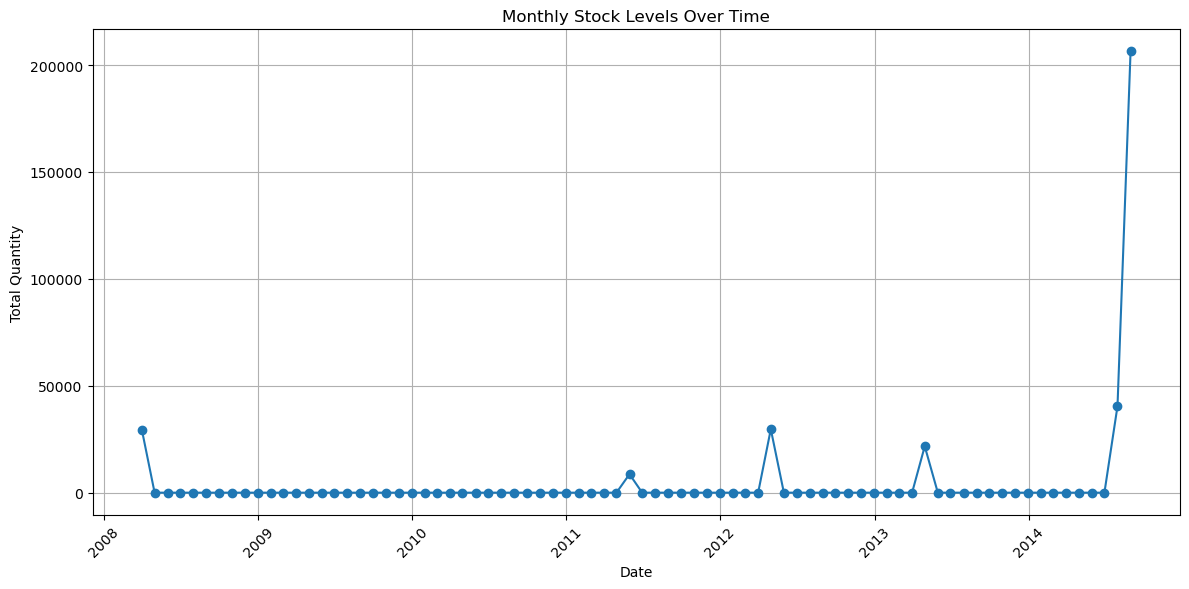

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure 'ModifiedDate' is in datetime format
product_inventory_data['ModifiedDate'] = pd.to_datetime(product_inventory_data['ModifiedDate'])

# Set 'ModifiedDate' as the index
product_inventory_data.set_index('ModifiedDate', inplace=True)

# Resample by month and sum quantities
monthly_stock = product_inventory_data.resample('M').sum()

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_stock.index, monthly_stock['Quantity'], marker='o', linestyle='-')
plt.title('Monthly Stock Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 23. Assess  the impact of supply chain disruptions on inventory.

#### Assessing the impact of supply chain disruptions on inventory involves several factors, including stock levels, stock turnover, reorder points, and historical trends. 

### Steps for Analysis:
#### 1.Identify Critical Inventory:Use the SafetyStockLevel column in the Product DataFrame to check if the current stock is below the safety stock level.
#### 2.Check for Overstock and Understock:These both scenarios can cause issues like delay in sales,excessive ordering or preventing stock replacement
#### 3.Analyze Reorder Points:Products below reorder points are not replanished may indicate supply chain disruptions.
#### 4.Check Recent Stock Adjustments: A lack of adjustments or irregular adjustments could signal supply chain disruptions.
#### 5.Calculate Stock Turnover:A sudden drop in stock turnover rate could be a result of supply chain disruptions.
#### 6.Calculate Days Since Last Stock Adjustment:Longer periods since the last stock adjustment may indicate supply chain delays.

In [149]:
# Merge ProductInventory and Product DataFrames to get safety stock information
merged_df = pd.merge(product_inventory_data, product_data, on='ProductID')
print("step-1\n")
# Filter products where Quantity is below SafetyStockLevel
critical_products = merged_df[merged_df['Quantity'] < merged_df['SafetyStockLevel']]

# Display critical products that might be affected by supply chain disruptions
print(critical_products[['ProductID', 'Quantity', 'SafetyStockLevel', 'LocationID']])
print("===========================================================================================")
print("step 2 and 3\n")
# Filter products where Quantity is below ReorderPoint(analyzing the reorder points)
understocked_products = merged_df[merged_df['Quantity'] < merged_df['ReorderPoint']]
overstocked_products = merged_df[merged_df['Quantity']> merged_df['SafetyStockLevel']]
# Display products that may require immediate reordering due to supply chain issues
print(understocked_products[['ProductID', 'Quantity', 'ReorderPoint', 'LocationID']])
print(overstocked_products[['ProductID', 'Quantity', 'ReorderPoint', 'LocationID']])
print("============================================================================================")

print("step-4\n")
# Calculate days since last stock adjustment for each location
product_inventory_data['ModifiedDate'] = pd.to_datetime(product_inventory_data['ModifiedDate'])


# Identify locations with delays in stock adjustments (e.g., no adjustment in the last 30 days)
locations_with_delays = product_inventory_data[product_inventory_data['LastStockAdjustment'] > 30]

# Display locations where stock adjustments are delayed, which could indicate supply chain disruptions
print(locations_with_delays[['LocationID', 'DaysSinceLastAdjustment']])

print("=============================================================================================")
print("step-5\n")

#Extracting the required columns from SalesOrderDetail data
goods_sold=sales_order_detail_data[['ProductID','OrderQty','UnitPrice']]

#Finding the total cost of all goods for each product and use reset_index() to reset the index values 
cost_goods_sold=goods_sold.groupby('ProductID')['UnitPrice'].sum().reset_index()
#Renaming the columns for better understanding
cost_goods_sold.columns=['ProductID','CostOfGoodsSold']


#Finding the average inventory
avg_int=product_inventory_data.groupby('ProductID')['Quantity'].mean().reset_index()
#renaming the columns for better understanding
avg_int.columns=['ProductID','AVGInventory']

#Merging the new dataframes on productID

stock_turn_over=pd.merge(cost_goods_sold,avg_int,on='ProductID',how='inner')

#calculating the stock turn over for each product

stock_turn_over['StockTurnOverRate']=stock_turn_over['CostOfGoodsSold']/stock_turn_over['AVGInventory']

#Printing the stock turnover rate for each productID
print(stock_turn_over[['ProductID','StockTurnOverRate']])
print("================================================================================================")

print("step-6\n")
print(product_inventory_data['LastStockAdjustment'].sort_values(ascending=False))
print("=================================================================================================")

step-1

      ProductID  Quantity  SafetyStockLevel  LocationID
0             1       408              1000           1
1             1       324              1000           6
2             1       353              1000          50
3             2       427              1000           1
4             2       318              1000           6
...         ...       ...               ...         ...
1062        996       174               500          50
1064        997        30               100          60
1065        998        99               100           7
1066        998        56               100          60
1067        999        78               100           7

[968 rows x 4 columns]
step 2 and 3

      ProductID  Quantity  ReorderPoint  LocationID
0             1       408           750           1
1             1       324           750           6
2             1       353           750          50
3             2       427           750           1
4             2       

### 24.Determine optimal reorder points for products based on demand.

#### To determine optimal reorder points (ROP) for products based on demand, you can use the following formula, which is commonly used in inventory management:
#### Reorder Point=(Average Daily Demand×Lead Time)+Safety Stock

In [160]:


# 1. Calculate total demand for each product
product_demand = sales_order_detail_data.groupby('ProductID')['OrderQty'].sum().reset_index()
product_demand.rename(columns={'OrderQty': 'TotalDemand'}, inplace=True)

# 2. Merge with product_vendor to get lead time
product_dt = pd.merge(product_demand, product_vendor, on='ProductID')

# 3. Calculate average daily demand (assuming a year of 365 days)
product_dt['AverageDailyDemand'] = product_dt['TotalDemand'] / 365

# 4. Calculate Reorder Point
product_dt['ReorderPoint'] = (product_dt['AverageDailyDemand'] * product_dt['AverageLeadTime'])+product_data['SafetyStockLevel']


# Display the results
print(product_dt['ReorderPoint'])


0     1515.013699
1     1536.876712
2      836.394521
3      802.958904
4     1631.328767
         ...     
90    1028.975342
91    1027.780822
92    1006.846575
93    1041.071233
94    1040.290411
Name: ReorderPoint, Length: 95, dtype: float64


In [161]:
product_inventory_data

,ProductID,LocationID,Shelf,Bin,Quantity,rowguid,ModifiedDate
0,1,1,A,1,408,47A24246-6C43-48EB-968F-025738A8A410,2014-08-08
1,1,6,B,5,324,D4544D7D-CAF5-46B3-AB22-5718DCC26B5E,2014-08-08
2,1,50,A,5,353,BFF7DC60-96A8-43CA-81A7-D6D2ED3000A8,2014-08-08
3,2,1,A,2,427,F407C07A-CA14-4684-A02C-608BD00C2233,2014-08-08
4,2,6,B,1,318,CA1FF2F4-48FB-4960-8D92-3940B633E4C1,2014-08-08
...,...,...,...,...,...,...,...
1064,997,60,N/A,0,30,731E624A-BD0D-447C-9FE1-472F73917897,2013-04-30
1065,998,7,N/A,0,99,B859A235-A1CC-48D7-92BB-10D0C2886E4E,2013-04-30
1066,998,60,N/A,0,56,5021E7EA-CE96-433C-860A-B9E57A45EF03,2013-04-30
1067,999,7,N/A,0,78,61A26DB0-BD17-442B-B119-8E5227811B82,2013-04-30
